# Training model for Weather Forcast 🌥️

>   ### Installing required libraries and neuralprophet as its the model we'll be working with

In [1]:
!pip install neuralprophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.4/145.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 33.7 MB/s eta 0:00:00
  Attempting uninstall: holidays
    Found existing installation: holidays 0.24
    Uninstalling holidays-0.24:
      Successfully uninstalled holidays-0.24
  Attempting uninstall: pytorch-lightning
    Found existing installation: pytorch-lightning 2.2.2
    Uninstalling pytorch-lightning-2.2.2:
      Successfully uninstalled pytorch-lightning-2.2.2


In [2]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

In [3]:
df = pd.read_csv('/kaggle/input/weather-ff/weather_dataset - weather_dataset.csv (1).csv', parse_dates=['date'])
df.tail()

,location_id,date,temperature_max,temperature_min,temperature_mean,apparent_temperature_mean,sunrise,sunset,rain_sum,wind_speed_max
153956,0,2024-04-28,32.26,17.55,22.90,22.50,04/28/2024 03:14:19,04/28/2024 16:29:59,0.0,5.71
153957,0,2024-04-30,31.77,19.22,22.90,22.60,04/30/2024 03:12:30,04/30/2024 16:31:18,0.0,7.47
153958,0,2024-05-01,30.93,21.21,25.76,25.51,05/01/2024 03:11:38,05/01/2024 16:31:58,0.0,7.34
153959,0,2024-05-05,27.78,19.49,23.20,22.65,05/05/2024 03:08:18,05/05/2024 16:34:37,0.0,7.33
153960,0,2024-05-06,27.18,17.27,18.82,18.22,05/06/2024 03:07:30,05/06/2024 16:35:17,0.0,5.67


In [4]:
df.location_id.unique()

array([0, 1, 2, 3, 4])

#### These respresents our 5 cities in Egypt: Cairo index[0], Alex[1],Aswan[2], Sharm[3], Zag[4].

In [5]:
df.dtypes

location_id                           int64
date                         datetime64[ns]
temperature_max                     float64
temperature_min                     float64
temperature_mean                    float64
apparent_temperature_mean           float64
sunrise                              object
sunset                               object
rain_sum                            float64
wind_speed_max                      float64
dtype: object

### Seperating the dataset by each city.

In [ ]:
cairo_dataset =df[df['location_id']== 0]
cairo_dataset['date'] = pd.to_datetime(cairo_dataset['date'])
cairo_dataset.head()

In [6]:
alex_dataset =df[df['location_id']== 1]
alex_dataset['date'] = pd.to_datetime(alex_dataset['date'])
alex_dataset.head()

WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_33/544484074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alex_dataset['date'] = pd.to_datetime(alex_dataset['date'])



,location_id,date,temperature_max,temperature_min,temperature_mean,apparent_temperature_mean,sunrise,sunset,rain_sum,wind_speed_max
30757,1,1940-01-02,16.2,10.4,13.3,9.4,1940-01-02 6:59,1940-01-02 17:09,0.0,20.6
30758,1,1940-01-03,13.9,8.5,11.2,6.4,1940-01-03 6:59,1940-01-03 17:09,0.3,24.7
30759,1,1940-01-04,15.5,11.5,13.7,10.8,1940-01-04 6:59,1940-01-04 17:10,0.6,19.7
30760,1,1940-01-05,16.1,9.8,12.5,10.3,1940-01-05 6:59,1940-01-05 17:11,0.0,13.1
30761,1,1940-01-06,18.1,8.4,12.6,9.8,1940-01-06 6:59,1940-01-06 17:12,0.0,14.3


In [7]:
aswan_dataset =df[df['location_id']== 2]
aswan_dataset['date'] = pd.to_datetime(aswan_dataset['date'])
aswan_dataset.head()

WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_33/1989777685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aswan_dataset['date'] = pd.to_datetime(aswan_dataset['date'])



,location_id,date,temperature_max,temperature_min,temperature_mean,apparent_temperature_mean,sunrise,sunset,rain_sum,wind_speed_max
61514,2,1940-01-02,21.3,9.9,14.9,10.5,1940-01-02 6:31,1940-01-02 17:12,0.0,19.1
61515,2,1940-01-03,19.9,6.5,13.4,10.1,1940-01-03 6:32,1940-01-03 17:13,0.0,9.9
61516,2,1940-01-04,19.1,6.9,12.9,8.8,1940-01-04 6:32,1940-01-04 17:13,0.0,14.5
61517,2,1940-01-05,19.9,6.9,13.0,9.9,1940-01-05 6:32,1940-01-05 17:14,0.0,13.4
61518,2,1940-01-06,20.9,8.1,14.2,11.6,1940-01-06 6:32,1940-01-06 17:15,0.0,9.7


In [ ]:
sharm_dataset =df[df['location_id']== 3]
sharm_dataset['date'] = pd.to_datetime(sharm_dataset['date'])
sharm_dataset.head()

In [ ]:
zag_dataset =df[df['location_id']== 4]
zag_dataset['date'] = pd.to_datetime(zag_dataset['date'])
zag_dataset.head()

## Cairo model training to get apparent min & max temp based on the input date
> ### First max temp model

In [8]:
aswan_dataset.dtypes

location_id                           int64
date                         datetime64[ns]
temperature_max                     float64
temperature_min                     float64
temperature_mean                    float64
apparent_temperature_mean           float64
sunrise                              object
sunset                               object
rain_sum                            float64
wind_speed_max                      float64
dtype: object

## Cleaning the dataset 🧹

In [9]:
cleaned_aswan = aswan_dataset.dropna(subset=['temperature_max'])

In [12]:
cleaned_aswan.head()

,location_id,date,temperature_max,temperature_min,temperature_mean,apparent_temperature_mean,sunrise,sunset,rain_sum,wind_speed_max
61514,2,1940-01-02,21.3,9.9,14.9,10.5,1940-01-02 6:31,1940-01-02 17:12,0.0,19.1
61515,2,1940-01-03,19.9,6.5,13.4,10.1,1940-01-03 6:32,1940-01-03 17:13,0.0,9.9
61516,2,1940-01-04,19.1,6.9,12.9,8.8,1940-01-04 6:32,1940-01-04 17:13,0.0,14.5
61517,2,1940-01-05,19.9,6.9,13.0,9.9,1940-01-05 6:32,1940-01-05 17:14,0.0,13.4
61518,2,1940-01-06,20.9,8.1,14.2,11.6,1940-01-06 6:32,1940-01-06 17:15,0.0,9.7


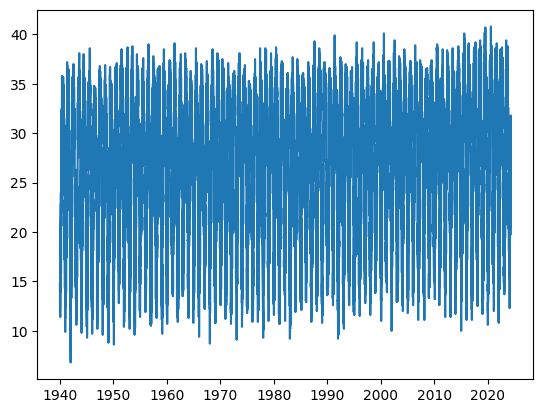

In [13]:
plt.plot(cleaned_aswan['date'], cleaned_aswan['temperature_mean'])
plt.show()

>  ## As we don't have missing values in the datatset the model is ready for training ✅

## Training the model on data till 2024 📅

In [27]:
cleaned_aswan.tail()

,location_id,date,temperature_max,temperature_min,temperature_mean,apparent_temperature_mean,sunrise,sunset,rain_sum,wind_speed_max,Year
153879,2,2024-04-17,37.0,20.2,29.6,27.3,2024-04-17 3:24,2024-04-17 16:11,0.0,15.8,2024
153880,2,2024-04-18,39.0,23.5,31.8,28.7,2024-04-18 3:23,2024-04-18 16:11,0.0,24.5,2024
153881,2,2024-04-19,36.0,23.7,29.9,25.9,2024-04-19 3:23,2024-04-19 16:12,0.0,22.6,2024
153882,2,2024-04-20,36.3,21.1,28.5,24.7,2024-04-20 3:22,2024-04-20 16:12,0.0,24.9,2024
153883,2,2024-04-21,36.9,19.7,29.2,25.1,2024-04-21 3:21,2024-04-21 16:12,0.0,23.4,2024


## Now train the model on the date and temp max.

In [28]:
data = cleaned_aswan[['date', 'rain_sum']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.tail()

WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_33/3196521030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
153879,2024-04-17,0.0
153880,2024-04-18,0.0
153881,2024-04-19,0.0
153882,2024-04-20,0.0
153883,2024-04-21,0.0


In [29]:
type(data)

pandas.core.frame.DataFrame

# Training the model 🦿
> #### with 2000 epochs as our dataset is large.

In [ ]:
m = NeuralProphet()
aswan_model = m.fit(data, freq='D', epochs=2000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.994% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is depre

Finding best initial lr:   0%|          | 0/262 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

### Trying random new dates to see how the training went 🔍

In [ ]:
dates = ['2024-04-27', '2024-04-28', '2024-05-01', '2024-05-02', '2024-05-03']
future = pd.DataFrame()
future['ds'] = pd.to_datetime(dates)
future['y'] = None
forecast = m.predict(future)

In [ ]:
forecast

# Saving the model 💾

In [ ]:
with open('aswan_rain.pkl', "wb") as f:
    pickle.dump(m, f)

> ### The same steps goes for min temp training and repeating the exact same process for the other cities. 🔁
